In [1]:
import pandas as pd
df = pd.read_csv("Traffic_Crashes.csv")
"""
Maybe try and predict what hour the crash happened
or predict the what kind of crash the crash hit,
or MOST_SEVERE_INJURY type, which has 5 options
from all the other factorsm remove:
lat and long, data,crash_dae,est_i,crash_record_id, and maybe more 
"""

/var/folders/8t/y5v94x215r973w80szwrht8r0000gq/T/ipykernel_6046/2438239821.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Traffic_Crashes.csv")


'\nMaybe try and predict what hour the crash happened\nor predict the what kind of crash the crash hit,\nor MOST_SEVERE_INJURY type, which has 5 options\nfrom all the other factorsm remove:\nlat and long, data,crash_dae,est_i,crash_record_id, and maybe more \n'

In [2]:
df.head(5)

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,96143f32b69c4b086becfe7dd07c746dc913954472f2d0...,NaN,09/30/2025 02:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,...,0.0,0.0,1.0,0.0,2,3,9,41.857666,-87.645787,POINT (-87.64578712427 41.857665788293)
1,303eead1cd453666cee87f05bf5547804b260ded566357...,NaN,09/29/2025 11:29:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,...,0.0,0.0,1.0,0.0,23,2,9,41.954430,-87.750172,POINT (-87.750172061887 41.954430241508)
2,dddfc8251db0607acd3f6af15282ea5d672186b424e17c...,NaN,09/29/2025 10:55:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,ONE-WAY,...,0.0,0.0,2.0,0.0,22,2,9,41.872392,-87.627396,POINT (-87.627396122243 41.872391868197)
3,77dedf5a81dd0f5e1ef932b1c80c79e1d6746ad51d17b8...,NaN,09/29/2025 10:48:00 PM,30,TRAFFIC SIGNAL,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,...,1.0,0.0,1.0,0.0,22,2,9,41.877544,-87.696257,POINT (-87.6962568014 41.877543802805)
4,3d60940512253f133935e5f3732db7aa715049a72e1d34...,NaN,09/29/2025 10:15:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,...,0.0,0.0,1.0,0.0,22,2,9,41.912716,-87.770457,POINT (-87.770456682056 41.912716438518)


In [3]:
df["FIRST_CRASH_TYPE"].unique()

array(['PARKED MOTOR VEHICLE', 'SIDESWIPE SAME DIRECTION', 'TURNING',
       'REAR END', 'PEDALCYCLIST', 'PEDESTRIAN',
       'SIDESWIPE OPPOSITE DIRECTION', 'REAR TO REAR', 'ANGLE',
       'FIXED OBJECT', 'REAR TO SIDE', 'REAR TO FRONT', 'OVERTURNED',
       'HEAD ON', 'OTHER NONCOLLISION', 'OTHER OBJECT', 'ANIMAL', 'TRAIN'],
      dtype=object)

<Axes: xlabel='LONGITUDE', ylabel='LATITUDE'>

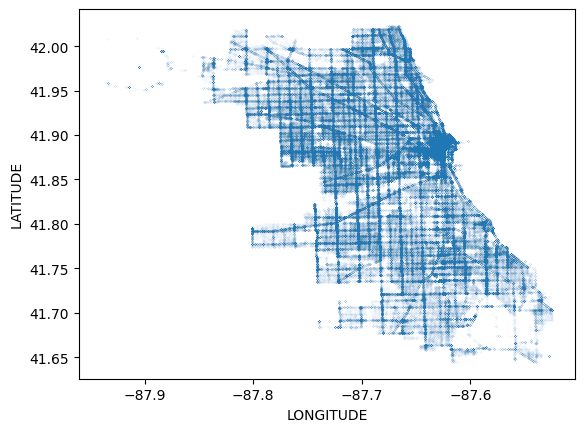

In [4]:
df[(df.LONGITUDE<-60) & (df.LATITUDE>30)].plot.scatter(x='LONGITUDE',y='LATITUDE',s=.00005) #for fun, look its chicago!

In [5]:
df.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

In [6]:
#checking column values before we start


In [7]:
df['MOST_SEVERE_INJURY'].value_counts()

MOST_SEVERE_INJURY
NO INDICATION OF INJURY     845724
NONINCAPACITATING INJURY     78890
REPORTED, NOT EVIDENT        44928
INCAPACITATING INJURY        16252
FATAL                         1049
Name: count, dtype: int64

In [8]:
df.isna().sum() #this one has no nans which is nie

CRASH_RECORD_ID                       0
CRASH_DATE_EST_I                 916993
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         789970
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       32462
CRASH_TYPE                            0
INTERSECTION_RELATED_I           761738
NOT_RIGHT_OF_WAY_I               944484
HIT_AND_RUN_I                    678690
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0
STREET_DIRECTION                      4


In [9]:
new_df = df.dropna(subset=['MOST_SEVERE_INJURY']) #so we only have data that has a most_server_injury
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

df_pedestrains = df[df['FIRST_CRASH_TYPE'].isin(['PEDESTRIAN','PEDALCYCLIST'])] #this is so it is only the people involed in a car crash with a bike/pedestrian

df_pedestrains = df_pedestrains[df_pedestrains['MOST_SEVERE_INJURY'] != 'REPORTED, NOT EVIDENT'] #removes all rows with this value

encoder = OrdinalEncoder(categories = [df_pedestrains['MOST_SEVERE_INJURY'].unique()])

df_pedestrains['MOST_SEVERE_INJURY'] = encoder.fit_transform(df_pedestrains[['MOST_SEVERE_INJURY']]) #this is so our labels vec is encoded correctly, 0,1,2,3,4,5 etc 

mapping = {0:0,1:0,2:1,3:1}


df_pedestrains['MOST_SEVERE_INJURY'] = df_pedestrains['MOST_SEVERE_INJURY'].replace(mapping)

y = df_pedestrains['MOST_SEVERE_INJURY']
X = df_pedestrains.drop('MOST_SEVERE_INJURY',axis=1)


In [10]:
df_pedestrains['MOST_SEVERE_INJURY']

6         0.0
10        0.0
15        0.0
16        0.0
42        0.0
         ... 
988766    1.0
988792    0.0
988838    0.0
988888    1.0
988997    0.0
Name: MOST_SEVERE_INJURY, Length: 33965, dtype: float64

In [11]:
print(X.shape)
y.value_counts()


(33965, 47)


MOST_SEVERE_INJURY
0.0    25883
1.0     8082
Name: count, dtype: int64

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [13]:
df_pedestrains['TRAFFICWAY_TYPE'].value_counts() #shouldnt have to worry about this because of the min freqeucy of the encoders 

TRAFFICWAY_TYPE
NOT DIVIDED                        14230
DIVIDED - W/MEDIAN (NOT RAISED)     5430
FOUR WAY                            4534
ONE-WAY                             3275
DIVIDED - W/MEDIAN BARRIER          1291
PARKING LOT                         1150
OTHER                                911
T-INTERSECTION                       883
ALLEY                                780
UNKNOWN                              339
CENTER TURN LANE                     302
DRIVEWAY                             230
UNKNOWN INTERSECTION TYPE            154
FIVE POINT, OR MORE                  119
Y-INTERSECTION                       104
RAMP                                  73
TRAFFIC ROUTE                         69
NOT REPORTED                          53
ROUNDABOUT                            29
L-INTERSECTION                         9
Name: count, dtype: int64

In [14]:
#numeric_features = ['POSTED_SPEED_LIMIT','NUM_UNITS','CRASH_HOUR','CRASH_DAY_OF_WEEK','CRASH_MONTH','STREET_NO']

#ordinal_features = ['LIGHTING_CONDITION','DEVICE_CONDITION','ROADWAY_SURFACE_COND','DAMAGE']

#oneHot_features = ['WEATHER_CONDITION','TRAFFIC_CONTROL_DEVICE','FIRST_CRASH_TYPE','TRAFFICWAY_TYPE','ROAD_DEFECT']

numeric_features = ['POSTED_SPEED_LIMIT','CRASH_DAY_OF_WEEK']
ordinal_features = ['LIGHTING_CONDITION','ROADWAY_SURFACE_COND','DAMAGE']
oneHot_features = ['WEATHER_CONDITION','ROAD_DEFECT']

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline #pipeline stuff
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

numeric_processor=Pipeline(steps = [
    ('scaler',StandardScaler())
    ])
categorical_processor=Pipeline(steps = [
    ('encoder',OneHotEncoder(handle_unknown='ignore',min_frequency=.05)) #the ignore, encodes it to [0,0,0] all zeros, and does this for all nan values
    ])
ordinal_processor = Pipeline(steps=[
    ('ordinal',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1,min_frequency=.05))
])
feature_processor = ColumnTransformer(transformers = [
    ('num',numeric_processor,numeric_features),
    ('cat',categorical_processor,oneHot_features),
    ('ordinal',ordinal_processor,ordinal_features)],
    remainder='drop' 
    )
pipe_clf = Pipeline(steps=[
    ('feature_processor',feature_processor),
    ('ploy_features',PolynomialFeatures()),
    ('clf',LogisticRegression())
    ])
pipe_clf

,steps,"[('feature_processor', ...), ('ploy_features', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [15]:
param_grid={
    'ploy_features__degree':range(1,4),
}
grid = GridSearchCV(pipe_clf,
                    param_grid,
                    cv=5,
                    scoring='average_precision',
                    verbose=1,
                    n_jobs=-1
                    )
grid.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
   

,estimator,Pipeline(step...egression())])
,param_grid,"{'ploy_features__degree': range(1, 4)}"
,scoring,'average_precision'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...), ...]"


In [16]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import TunedThresholdClassifierCV


In [17]:
#this is tuning the threshold amount
tuned_pipe = TunedThresholdClassifierCV(estimator=grid, 
                                        scoring="f1", #uses a combo of recall and precision, tries to max both of them=
                                        thresholds=300,
                                        n_jobs=-1)
# balanced accuracy 
tuned_pipe.fit(X_train,y_train)
y_test_pred = tuned_pipe.predict(X_test)
print(tuned_pipe.best_threshold_)
print(confusion_matrix(y_test,y_test_pred))
print(accuracy_score(y_test,y_test_pred))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
   

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
   

0.20942678822253427
[[2418 4026]
 [ 522 1526]]
0.4644371172868582


In [18]:
#NOW WE WILL TRY A DECISION TREE
from sklearn.tree import DecisionTreeClassifier
pipe_clf = Pipeline(steps=[
    ('feature_processor',feature_processor),
    ('ploy_features',PolynomialFeatures()),
    ('clf',DecisionTreeClassifier())
    ])
pipe_clf

,steps,"[('feature_processor', ...), ('ploy_features', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [19]:
param_grid={
    'ploy_features__degree':range(1,4),
    'clf__max_depth':range(1,5),
    'clf__max_leaf_nodes':[None,3,5,10],
}
grid = GridSearchCV(pipe_clf,
                          param_grid,
                          cv=5,
                          scoring='average_precision',
                          verbose=1,
                           n_jobs=-1
                         )
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


,estimator,Pipeline(step...lassifier())])
,param_grid,"{'clf__max_depth': range(1, 5), 'clf__max_leaf_nodes': [None, 3, ...], 'ploy_features__degree': range(1, 4)}"
,scoring,'average_precision'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...), ...]"


In [31]:
def f1_tuned_scorer(y_test,y_test_pred):
    mat = confusion_matrix(y_test,y_test_pred)
    tn = mat[0][0]
    fn = mat[1][0]
    fp = mat[0][1]
    tp = mat[1][1]
    value = (2*tp) / ( (2*tp) + fn + 500* fp )
    return value 
from sklearn.metrics import make_scorer

f1_tuned = make_scorer(f1_tuned_scorer)

In [41]:
tuned_pipe = TunedThresholdClassifierCV(estimator=grid.best_estimator_, 
                                        scoring=f1_tuned, #uses a combo of recall and precision, tries to max both of them=
                                        thresholds=300,
                                        n_jobs=-1)
tuned_pipe.fit(X_train,y_train)

,estimator,Pipeline(step...ax_depth=4))])
,scoring,make_scorer(f...hod='predict')
,response_method,'auto'
,thresholds,300
,cv,None
,refit,True
,n_jobs,-1
,random_state,None
,store_cv_results,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'


In [42]:
y_test_pred = tuned_pipe.predict(X_test)
print(tuned_pipe.best_threshold_)
print(confusion_matrix(y_test,y_test_pred))
print(accuracy_score(y_test,y_test_pred))

0.43812709030100333
[[6435    9]
 [2046    2]]
0.7580075365049458


In [45]:
#tuned_pipe.estimator_['ploy_features']
tuned_pipe.estimator_

,steps,"[('feature_processor', ...), ('ploy_features', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


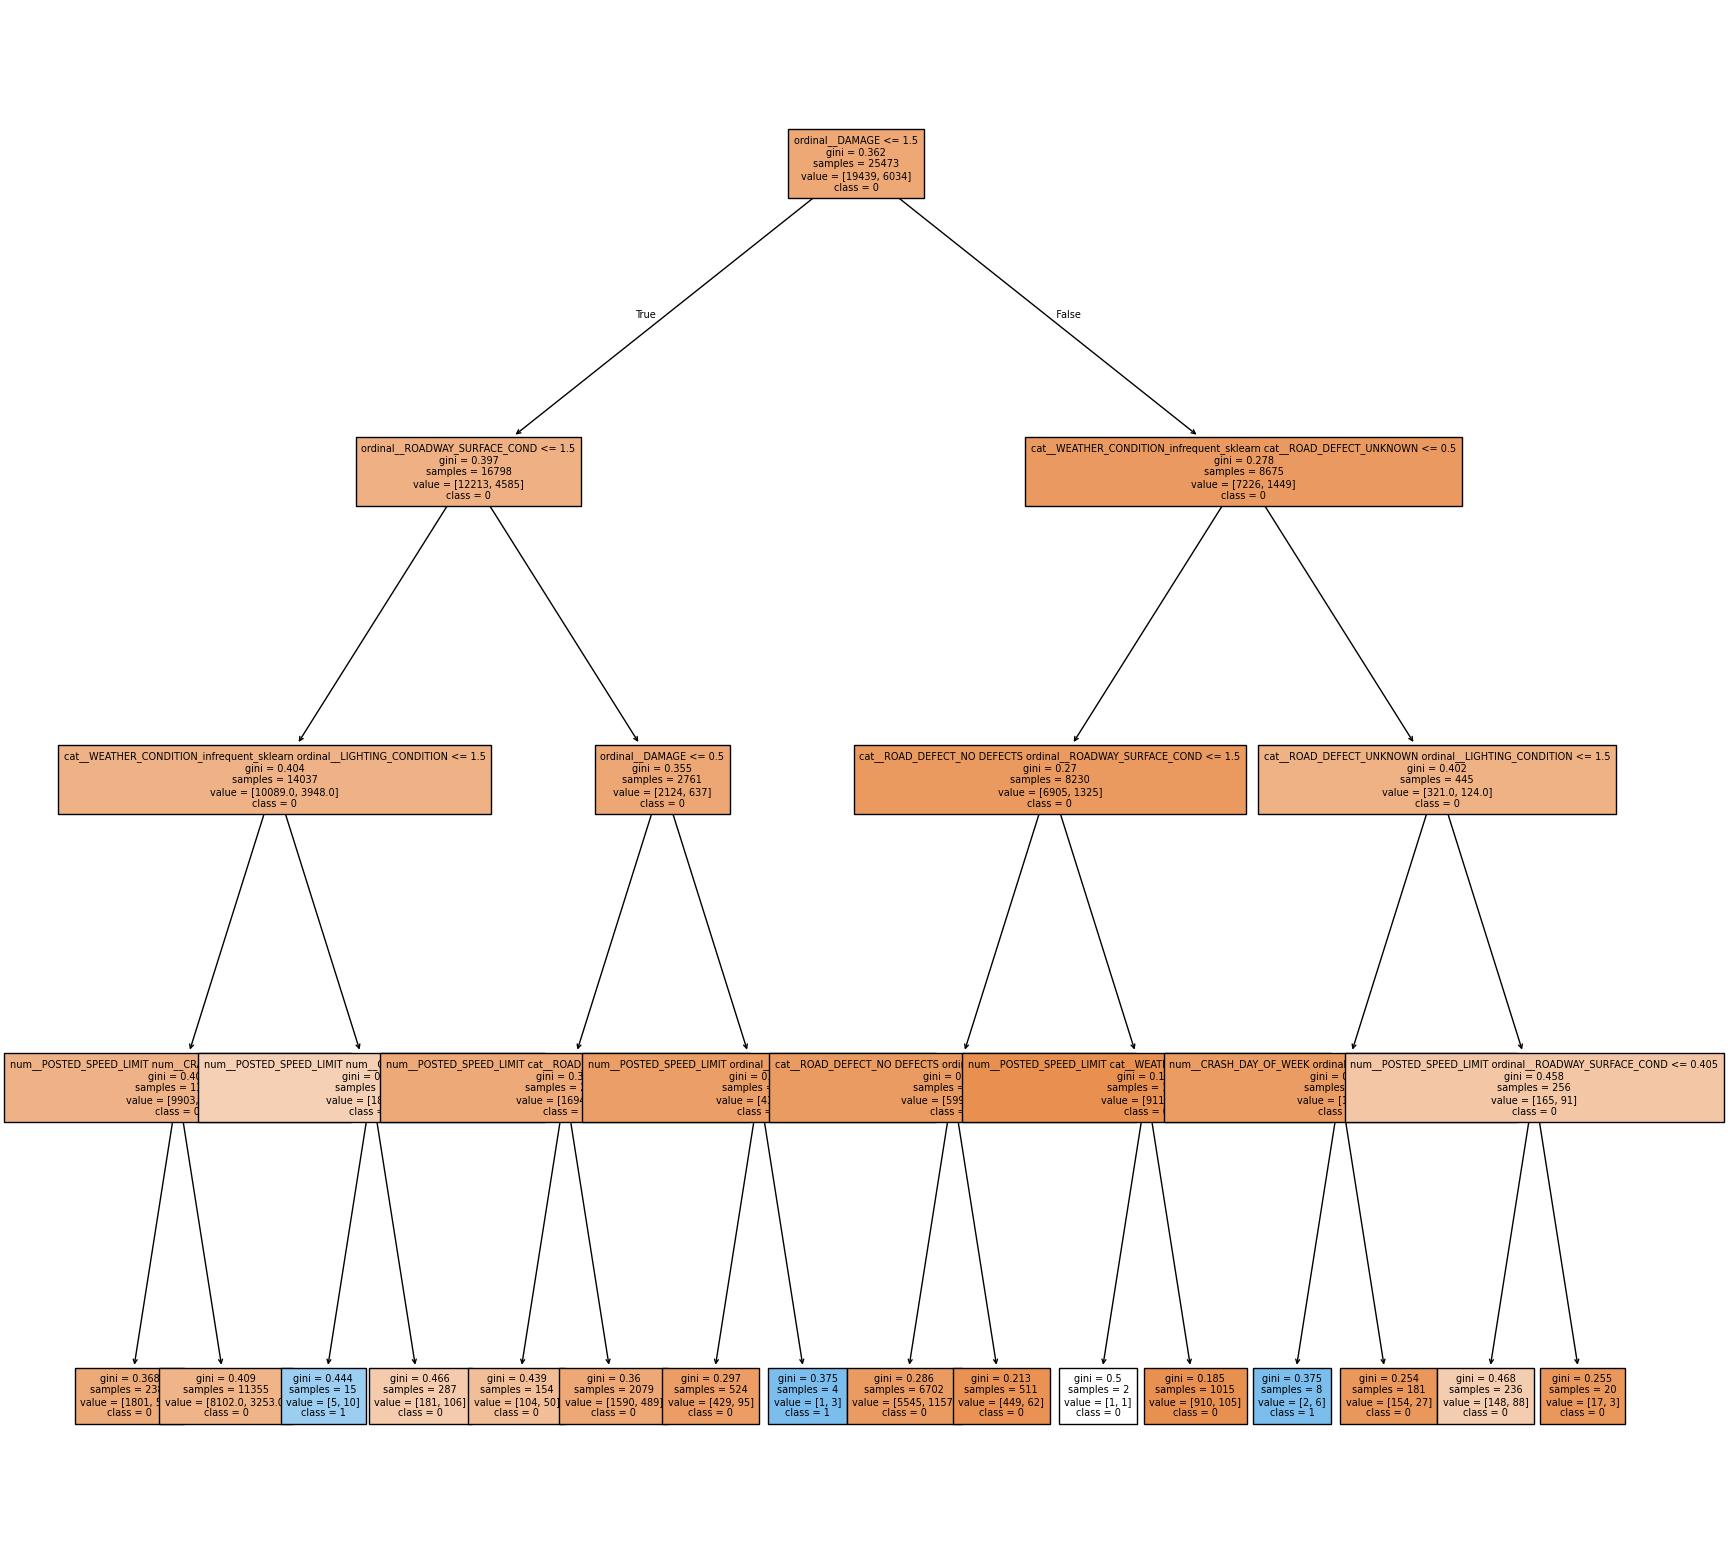

In [56]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
temp = tuned_pipe.estimator_
feature_name = temp['ploy_features'].get_feature_names_out(temp['feature_processor'].get_feature_names_out())

tree = temp['clf']
#plt.figure(figsize=(15,8))
plt.figure(figsize=(20, 20))
plot_tree(tree,
          feature_names= feature_name, #we will do this later
          class_names=['0','1'],
          filled=True,
          fontsize=7
         )
plt.show()